In [1]:
import tweepy
from tweepy import OAuthHandler
import pandas as pd
import json
import sys
import emoji
import numpy as np
import datetime
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
consumer_key = 'usR2qe5HtTX0eyDCRhQOufHTa'
consumer_secret = 'MQ7g4HISSRNP0Ib9H80Avv1BxlOqIjKB8CmqlRvKvs8c6JPhhH'
access_key = '798640585359982592-PivpURRxl6hL92t8cb02DIH8N2c1ax0'
access_secret = 'dqADIUXYWt3hgVWI1fjjTsA1wMGJ1uyEBRgaGGlnU9yy9'
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

In [8]:
following = api.friends_ids(screen_name = 'TyquanAssassin')

In [9]:
follower = api.followers_ids(screen_name = 'TyquanAssassin')

In [106]:
follower

[988879483808702467,
 992179874008887296,
 3304788669,
 990708751777910785,
 3568119796,
 164661216,
 881209688922238976,
 820081984336605184,
 2430510954,
 990229452159365120,
 989679215946731525,
 988575463466569728,
 359005605,
 4345425520,
 387453255,
 4748464583,
 914023934206423040,
 1144375219,
 30309827,
 351892463,
 988491865375813632,
 954188282161754114,
 988277274339356673,
 987549759807344640,
 979502017461870592,
 987475514590887937,
 2886739682,
 984464307948670976,
 987090404586803200,
 1840059912,
 1723781772,
 986648022296727554,
 985653771677159424,
 983934757783425025,
 2871530259,
 985424049042898945,
 2482950445,
 975376638635663361,
 153678781,
 758730667907690496,
 824799043033391104,
 495163935,
 984454814351360002,
 970786750670032896,
 3400504100,
 978694062634098688,
 924095804859715585,
 983930184737918976,
 982708786828926976,
 100131132,
 983468225617854465,
 983420709132103685,
 3906173904,
 724527514849316864,
 973642664095698944,
 102422242,
 298317445

In [3]:
def get_tweet_todf(user_id):
    ID = []
    texts = []
    possibly_sensitive = []
    favorited = []
    favorite_count = []
    retweet_count = []
    retweeted = []
    truncated = []
    created_at = []
    for page in range(1,10):
        a = len(ID)
        
        tweets = api.user_timeline(id=user_id,count = 500,page=page)
        ID += [tweet.id for tweet in tweets]
        if len(ID) == a:
            break
            
        favorited += [tweet.favorited for tweet in tweets]
        favorite_count += [tweet.favorite_count for tweet in tweets]
        retweet_count += [tweet.retweet_count for tweet in tweets]
        retweeted += [tweet.retweeted for tweet in tweets]
        truncated += [tweet.truncated for tweet in tweets]
        texts += [tweet.text for tweet in tweets]
        created_at += [tweet.created_at for tweet in tweets]
        print('number of tweets:',len(texts))
    return pd.DataFrame({'id':ID,'texts':texts,'favorited':favorited,'favorite_count':favorite_count,'retweet_count':retweet_count,'retweeted':retweeted,'truncated':truncated,"created_at":created_at})

def extract_emojis(str):
    return ''.join(c for c in str if c in emoji.UNICODE_EMOJI)

def word_frequency(word):
    count = 0
    for text in texts:
        if word in text.lower().split():
            count += 1
    return count / len(texts)

### word cloud 
from wordcloud import WordCloud
def word_cloud(df):
    all_texts = ''.join(df.text.values)
    all_texts = all_texts.replace('dat','')
    all_texts = all_texts.replace('da','')
    all_texts = all_texts.replace('Da','')
    all_texts = all_texts.replace('RT','')
    all_texts = all_texts.replace('https','')
    all_texts = all_texts.replace('co','')

    wordcloud = WordCloud(background_color="white",width=1000, height=900, margin=2).generate(all_texts)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(40, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
def extract_texts(df):
    return ''.join(df.texts.values)

In [6]:
df = get_tweet_todf('448734451') ### tyquanassasin

number of tweets: 192
number of tweets: 386
number of tweets: 569
number of tweets: 765
number of tweets: 956
number of tweets: 1148
number of tweets: 1342
number of tweets: 1535
number of tweets: 1727


In [11]:
d = {}

In [52]:
for i in range(716,len(follower)):
    print('user',i)
    try:
        d['df'+str(i)] = get_tweet_todf(follower[i])
        
    except tweepy.TweepError:
        print("Failed to run the command on that user, Skipping...")
    
    

user 716
number of tweets: 179
number of tweets: 372
number of tweets: 563
number of tweets: 762
number of tweets: 961
number of tweets: 1159
number of tweets: 1175
user 717
number of tweets: 36
user 718
number of tweets: 104
user 719
number of tweets: 198
number of tweets: 388
number of tweets: 557
number of tweets: 734
number of tweets: 910
number of tweets: 1088
number of tweets: 1265
number of tweets: 1438
number of tweets: 1600
user 720
number of tweets: 169
user 721
Failed to run the command on that user, Skipping...
user 722
number of tweets: 200
number of tweets: 399
number of tweets: 597
number of tweets: 768
user 723
number of tweets: 3
user 724
number of tweets: 9
user 725
Failed to run the command on that user, Skipping...
user 726
number of tweets: 5
user 727
number of tweets: 181
number of tweets: 190
user 728
number of tweets: 199
number of tweets: 391
number of tweets: 588
number of tweets: 785
number of tweets: 984
number of tweets: 1060
user 729
number of tweets: 183


number of tweets: 199
number of tweets: 399
number of tweets: 599
number of tweets: 799
number of tweets: 999
number of tweets: 1199
number of tweets: 1399
number of tweets: 1599
number of tweets: 1799
user 799
number of tweets: 197
number of tweets: 392
number of tweets: 582
number of tweets: 779
number of tweets: 976
number of tweets: 1167
number of tweets: 1357
number of tweets: 1540
number of tweets: 1717
user 800
number of tweets: 187
number of tweets: 373
number of tweets: 536
number of tweets: 717
number of tweets: 900
number of tweets: 1092
number of tweets: 1271
number of tweets: 1452
number of tweets: 1643
user 801
number of tweets: 21
user 802
number of tweets: 199
number of tweets: 396
number of tweets: 594
number of tweets: 789
number of tweets: 986
number of tweets: 1185
number of tweets: 1382
number of tweets: 1576
number of tweets: 1770
user 803
number of tweets: 193
number of tweets: 387
number of tweets: 586
number of tweets: 785
number of tweets: 981
number of tweets

number of tweets: 196
number of tweets: 249
user 880
number of tweets: 190
number of tweets: 388
number of tweets: 585
number of tweets: 780
number of tweets: 976
number of tweets: 1175
number of tweets: 1225
user 881
Failed to run the command on that user, Skipping...
user 882
number of tweets: 197
number of tweets: 356
user 883
number of tweets: 56
user 884
number of tweets: 77
user 885
number of tweets: 4
user 886
Failed to run the command on that user, Skipping...
user 887
Failed to run the command on that user, Skipping...
user 888
number of tweets: 12
user 889
number of tweets: 6
user 890
number of tweets: 191
number of tweets: 263
user 891
number of tweets: 5
user 892
number of tweets: 55
user 893
number of tweets: 199
number of tweets: 397
number of tweets: 595
number of tweets: 791
number of tweets: 990
number of tweets: 1189
number of tweets: 1388
number of tweets: 1583
number of tweets: 1783
user 894
Failed to run the command on that user, Skipping...
user 895
Failed to run 

number of tweets: 584
number of tweets: 759
number of tweets: 938
number of tweets: 1124
number of tweets: 1298
number of tweets: 1484
number of tweets: 1676
user 973
number of tweets: 14
user 974
number of tweets: 193
number of tweets: 384
number of tweets: 573
number of tweets: 767
number of tweets: 936
user 975
number of tweets: 1
user 976
number of tweets: 189
user 977
number of tweets: 34
user 978
number of tweets: 200
number of tweets: 399
number of tweets: 593
number of tweets: 788
number of tweets: 978
number of tweets: 1176
number of tweets: 1369
number of tweets: 1562
number of tweets: 1760
user 979
number of tweets: 166
number of tweets: 363
number of tweets: 470
user 980
Failed to run the command on that user, Skipping...
user 981
number of tweets: 184
number of tweets: 208
user 982
number of tweets: 194
number of tweets: 199
user 983
number of tweets: 197
number of tweets: 395
number of tweets: 594
number of tweets: 792
number of tweets: 980
number of tweets: 1165
number o

number of tweets: 200
number of tweets: 398
number of tweets: 434
user 1048
number of tweets: 29
user 1049
user 1050
number of tweets: 198
number of tweets: 392
number of tweets: 592
number of tweets: 792
number of tweets: 992
number of tweets: 1191
number of tweets: 1391
number of tweets: 1591
number of tweets: 1788
user 1051
number of tweets: 190
number of tweets: 226
user 1052
number of tweets: 5
user 1053
number of tweets: 34
user 1054
number of tweets: 3
user 1055
number of tweets: 194
number of tweets: 381
user 1056
number of tweets: 199
number of tweets: 399
number of tweets: 599
number of tweets: 799
number of tweets: 998
number of tweets: 1194
number of tweets: 1394
number of tweets: 1594
number of tweets: 1794
user 1057
number of tweets: 95
user 1058
Failed to run the command on that user, Skipping...
user 1059
number of tweets: 149
user 1060
number of tweets: 178
number of tweets: 368
number of tweets: 565
number of tweets: 762
number of tweets: 953
number of tweets: 1146
nu

Failed to run the command on that user, Skipping...
user 1161
Failed to run the command on that user, Skipping...
user 1162
Failed to run the command on that user, Skipping...
user 1163
Failed to run the command on that user, Skipping...
user 1164
Failed to run the command on that user, Skipping...
user 1165
Failed to run the command on that user, Skipping...
user 1166
Failed to run the command on that user, Skipping...
user 1167
Failed to run the command on that user, Skipping...
user 1168
Failed to run the command on that user, Skipping...
user 1169
Failed to run the command on that user, Skipping...
user 1170
Failed to run the command on that user, Skipping...
user 1171
Failed to run the command on that user, Skipping...
user 1172
Failed to run the command on that user, Skipping...
user 1173
Failed to run the command on that user, Skipping...
user 1174
Failed to run the command on that user, Skipping...
user 1175
Failed to run the command on that user, Skipping...
user 1176
Failed t

number of tweets: 388
number of tweets: 581
number of tweets: 770
number of tweets: 959
number of tweets: 1157
number of tweets: 1353
number of tweets: 1550
number of tweets: 1744
user 1287
number of tweets: 200
number of tweets: 400
number of tweets: 600
number of tweets: 793
number of tweets: 987
number of tweets: 1184
number of tweets: 1379
number of tweets: 1574
number of tweets: 1771
user 1288
Failed to run the command on that user, Skipping...
user 1289
number of tweets: 198
number of tweets: 221
user 1290
number of tweets: 188
number of tweets: 333
number of tweets: 431
user 1291
number of tweets: 200
number of tweets: 400
number of tweets: 598
number of tweets: 796
number of tweets: 995
number of tweets: 1192
number of tweets: 1392
number of tweets: 1591
number of tweets: 1791
user 1292
Failed to run the command on that user, Skipping...
user 1293
number of tweets: 197
number of tweets: 393
number of tweets: 589
number of tweets: 785
number of tweets: 979
number of tweets: 1173

KeyboardInterrupt: 

In [97]:
len(d)

996

In [98]:
for i,key in enumerate(d.keys()):
    print(i,key)

0 df1332
1 df734
2 df809
3 df160
4 df688
5 df2
6 df987
7 df1057
8 df63
9 df1284
10 df444
11 df164
12 df768
13 df981
14 df957
15 df788
16 df1049
17 df1015
18 df21
19 df1300
20 df215
21 df481
22 df336
23 df245
24 df292
25 df371
26 df1301
27 df401
28 df370
29 df1304
30 df830
31 df147
32 df667
33 df476
34 df260
35 df13
36 df847
37 df906
38 df948
39 df859
40 df552
41 df51
42 df662
43 df1324
44 df379
45 df990
46 df910
47 df1087
48 df1077
49 df678
50 df594
51 df719
52 df409
53 df1317
54 df1082
55 df443
56 df709
57 df554
58 df589
59 df404
60 df319
61 df938
62 df786
63 df802
64 df1084
65 df90
66 df798
67 df1039
68 df733
69 df710
70 df429
71 df851
72 df168
73 df127
74 df973
75 df16
76 df950
77 df402
78 df296
79 df616
80 df95
81 df1083
82 df421
83 df195
84 df31
85 df137
86 df1334
87 df190
88 df66
89 df1038
90 df1043
91 df272
92 df853
93 df369
94 df648
95 df931
96 df878
97 df378
98 df691
99 df528
100 df796
101 df883
102 df1327
103 df527
104 df1072
105 df264
106 df1026
107 df704
108 df911
109 df951

In [99]:
l = [''.join(df.texts.values)]
for key in d.keys():
    l.append(extract_texts(d[key]))

In [100]:
vect = TfidfVectorizer()
tfidf = vect.fit_transform(l)
s = (tfidf * tfidf.T).A

In [101]:
(s[0] > 0.4).sum()

9

In [102]:
s[0]

array([  1.00000000e+00,   2.41336067e-01,   1.11684272e-01,
         2.02855425e-01,   2.46760309e-01,   2.23174883e-01,
         8.61476813e-02,   2.10860935e-01,   9.24761936e-02,
         3.13222427e-02,   3.03960441e-01,   2.57061999e-01,
         1.18726179e-01,   2.89421884e-02,   2.23499673e-01,
         1.78611709e-01,   1.54952942e-01,   0.00000000e+00,
         2.62541122e-01,   3.89042863e-02,   5.69037272e-02,
         1.84821642e-01,   4.86635677e-02,   3.62745001e-02,
         1.76174640e-01,   2.42587977e-01,   2.29282364e-01,
         2.72413684e-01,   1.38976406e-01,   1.46347677e-01,
         2.54274362e-01,   2.69199930e-01,   3.32212274e-01,
         9.06279341e-02,   5.07801522e-02,   1.08655373e-01,
         2.29100434e-01,   2.47791332e-01,   1.88113667e-01,
         1.52063127e-01,   2.38854398e-01,   2.88932637e-01,
         0.00000000e+00,   2.77740210e-02,   1.03342121e-01,
         1.99193438e-01,   2.51831354e-01,   1.76219209e-01,
         9.56626325e-02,

In [103]:
users = []
for i,j in enumerate(s[0][1:]):
    if j > 0.4:
        print(i,j)
        print(list(d.keys())[i])
        users.append(list(d.keys())[i])

89 0.439013866297
df1038
172 0.460387439241
df862
457 0.421550475142
df805
659 0.407101591241
df778
669 0.444416104016
df1032
705 0.423504583673
df750
862 0.414726589758
df41
957 0.425727358683
df913


In [104]:
users = []
for i,j in enumerate(s[0][1:]):
    if j > 0.4:
        print(i,j)
        print(list(d.keys())[i])
        users.append(list(d.keys())[i])

89 0.439013866297
df1038
172 0.460387439241
df862
457 0.421550475142
df805
659 0.407101591241
df778
669 0.444416104016
df1032
705 0.423504583673
df750
862 0.414726589758
df41
957 0.425727358683
df913


In [105]:
users

['df1038', 'df862', 'df805', 'df778', 'df1032', 'df750', 'df41', 'df913']

In [110]:
for user in users:
    print(follower[int(user[2:])])
    

3302226641
1270629457
497652820
1564419072
349168702
771262231614935040
495163935
339385646


In [107]:
follower[41]

495163935

In [43]:
d['df312']

,created_at,favorite_count,favorited,id,retweet_count,retweeted,texts,truncated
0,2018-04-22 00:59:33,0,False,987858412099784704,9100,False,RT @sighbrattt: Yes I know bitches don’t like ...,False
1,2018-04-22 00:51:58,0,False,987856502944878594,29,False,RT @prettyNuski_: I be Tryna make the best out...,False
2,2018-04-22 00:42:27,0,False,987854108924219399,3131,False,RT @livingd0ll: I loveeee my mama can’t nobody...,False
3,2018-04-22 00:41:11,0,False,987853788634599424,242,False,RT @nickaule131: Zarii leaves the hospital Tue...,False
4,2018-04-22 00:40:52,0,False,987853711060987904,3420,False,RT @livingd0ll: DO WHATEVER MAKE U HAPPY! Period,False
5,2018-04-22 00:38:45,0,False,987853177012801536,181,False,RT @A1AndForeign__: My DM’s is full of niggas ...,False
6,2018-04-22 00:37:07,0,False,987852767560597504,15,False,RT @LilTwan079: Free 100K 😔💔,False
7,2018-04-22 00:34:32,0,False,987852114566270976,34,False,RT @LilTwan079: On Toon ain’t Nomo Kick it Tic...,False
8,2018-04-22 00:20:35,0,False,987848605104005120,3662,False,RT @ViewsFromKi: Phone stay on dnd cause y'all...,False
9,2018-04-22 00:13:52,0,False,987846916103950343,49,False,RT @moneyyy_100: I hate miserable ass baby mom...,False


In [92]:
l = [''.join(df.texts.values)]
l.append(extract_texts(d['df3214']))
vect = TfidfVectorizer()
tfidf = vect.fit_transform(l)
s = (tfidf * tfidf.T).A

In [93]:
s

array([[ 1.       ,  0.7239909],
       [ 0.7239909,  1.       ]])

In [12]:
u = api.get_user(follower[3215])
print(u.screen_name)

mr10k_takeyohoe


In [18]:
s[0]

array([ 1.        ,  0.08302372,  0.34937915,  0.05784659,  0.35972637,
        0.22796536,  0.        ,  0.07669362,  0.        ,  0.30840777,
        0.35420837,  0.14201824,  0.13937205,  0.02661909,  0.24658798,
        0.28323783,  0.40318277,  0.12370376,  0.07444271,  0.        ,  0.        ])

In [ ]:
t1 = ''.join(df_164661216.texts.values)
t2 = ''.join(df_881209688922238976.texts.values)

vect = TfidfVectorizer()
tfidf = vect.fit_transform()
s = (tfidf * tfidf.T).A

In [53]:
def get_tweet(screen_name):
    ID = []
    texts = []
    possibly_sensitive = []
    favorited = []
    favorite_count = []
    retweet_count = []
    retweeted = []
    truncated = []
    created_at = []
    for page in range(1,20):
        tweets = api.user_timeline(screen_name=screen_name,count = 500,page=page)
        ID += [tweet.id for tweet in tweets]
        favorited += [tweet.favorited for tweet in tweets]
        favorite_count += [tweet.favorite_count for tweet in tweets]
        retweet_count += [tweet.retweet_count for tweet in tweets]
        retweeted += [tweet.retweeted for tweet in tweets]
        truncated += [tweet.truncated for tweet in tweets]
        texts += [tweet.text for tweet in tweets]
        created_at += [tweet.created_at for tweet in tweets]
        print('number of tweets:',len(texts))
    return pd.DataFrame({'id':ID,'texts':texts,'favorited':favorited,'favorite_count':favorite_count,'retweet_count':retweet_count,'retweeted':retweeted,'truncated':truncated,"created_at":created_at})

def extract_emojis(str):
    return ''.join(c for c in str if c in emoji.UNICODE_EMOJI)


def word_frequency(word):
    count = 0
    for text in texts:
        if word in text.lower().split():
            count += 1
    return count / len(texts)

In [55]:
df_THEREALIRONMIC = get_tweet('THEREALIRONMIC')

number of tweets: 195
number of tweets: 393
number of tweets: 580
number of tweets: 776
number of tweets: 976
number of tweets: 1170
number of tweets: 1369
number of tweets: 1567
number of tweets: 1765
number of tweets: 1965
number of tweets: 2165
number of tweets: 2365
number of tweets: 2565
number of tweets: 2765
number of tweets: 2963
number of tweets: 3163
number of tweets: 3163
number of tweets: 3163
number of tweets: 3163


In [93]:
df_THEREALIRONMIC = pd.DataFrame(df_THEREALIRONMIC)
df_THEREALIRONMIC

,date,polarity,sentiment,text
0,2018-04-12 17:15:28,0.000000,neutral,Russia prepares for nuclear war with US https:...
1,2018-04-06 14:27:44,0.000000,neutral,RT @CobeWilliams: Hanging out with my brothers...
2,2018-04-06 14:27:03,0.000000,neutral,This is what we do!!!! #cureviolence marcusmca...
3,2018-03-05 20:55:28,0.000000,neutral,Yooooooooooo @YoungSo 2/3rds Ach https://t.co/...
4,2017-12-26 15:52:57,-0.200000,negative,RT @WizzyDizzymite: Throwback of Dr. Umar spea...
5,2017-12-26 05:07:36,0.250000,positive,To all you goofy ass n*ggas who wore the Chris...
6,2017-12-01 17:03:49,-0.312500,negative,RT @angiee11_21: Pulling up ya thong until it ...
7,2017-12-01 04:50:51,0.000000,neutral,RT @taylor2fly: @THEREALIRONMIC https://t.co/n...
8,2017-11-18 03:07:31,0.000000,neutral,RT @taylor2fly: @THEREALIRONMIC https://t.co/s...
9,2017-09-30 15:35:16,0.000000,neutral,RT @DeeJay138: Big platforms for big ideas. S/...


In [95]:
df_generalvanguard = pd.DataFrame(df_generalvanguard)

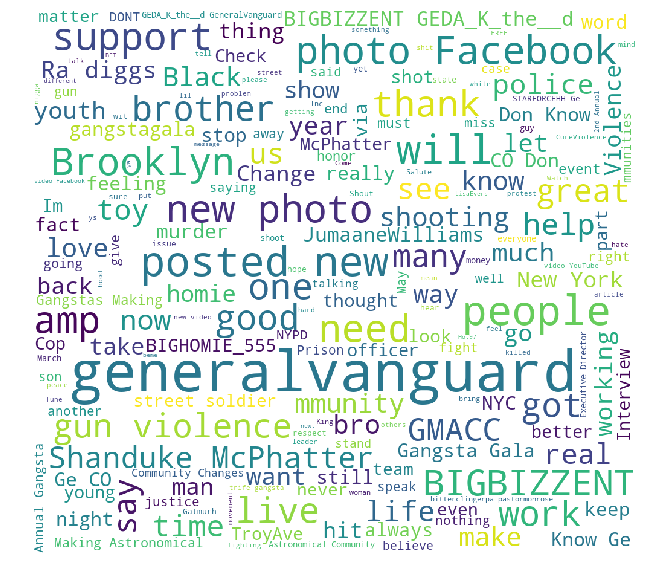

In [96]:
### word cloud 
word_cloud(df_generalvanguard)

In [4]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
 
class TwitterClient(object):
    '''
    Generic Twitter Class for sentiment analysis.
    '''
    def __init__(self):
        '''
        Class constructor or initialization method.
        '''
        # keys and tokens from the Twitter Dev Console
        consumer_key = 'usR2qe5HtTX0eyDCRhQOufHTa'
        consumer_secret = 'MQ7g4HISSRNP0Ib9H80Avv1BxlOqIjKB8CmqlRvKvs8c6JPhhH'
        access_token = '798640585359982592-PivpURRxl6hL92t8cb02DIH8N2c1ax0'
        access_token_secret = 'dqADIUXYWt3hgVWI1fjjTsA1wMGJ1uyEBRgaGGlnU9yy9'

        # attempt authentication
        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
        except:
            print("Error: Authentication Failed")
 
    def clean_tweet(self, tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
 
    def get_tweet_sentiment(self, tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
    

    
    def get_tweets(self, username):
        '''
        Main function to fetch tweets and parse them.
        '''
        # empty list to store parsed tweets
        tweets = []
 
        try:
            # call twitter api to fetch tweets
            for page in range(1,20):
                print(len(tweets))
                fetched_tweets = self.api.user_timeline(username, count = 500, page = page)
                             
 
            # parsing tweets one by one
                for tweet in fetched_tweets:
                    # empty dictionary to store required params of a tweet
                    parsed_tweet = {}

                    # saving text of tweet
                    parsed_tweet['text'] = tweet.text
                    # saving sentiment of tweet
                    parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)
                    
                    parsed_tweet['date'] = tweet.created_at
                    
                    parsed_tweet['polarity'] = TextBlob(self.clean_tweet(tweet.text)).sentiment.polarity
                    
                    # appending parsed tweet to tweets list
                    if tweet.retweet_count > 0:
                        # if tweet has retweets, ensure that it is appended only once
                        if parsed_tweet not in tweets:
                            tweets.append(parsed_tweet)
                    else:
                        tweets.append(parsed_tweet)
 
            # return parsed tweets
            return tweets
 
        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))
 
def tweet_func(username):
    # creating object of TwitterClient Class
    api = TwitterClient()
    # calling function to get tweets
    tweets = api.get_tweets(username)
 
    # picking positive tweets from tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    # percentage of positive tweets
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
    # picking negative tweets from tweets
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    # percentage of negative tweets
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
    # percentage of neutral tweets
    print("Neutral tweets percentage: {} %".format((100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets))))
    
    # printing first 5 positive tweets
    print("\n\nPositive tweets:")
    for tweet in ptweets[:10]:
        print(tweet['text'])
 
    # printing first 5 negative tweets
    print("\n\nNegative tweets:")
    for tweet in ntweets[:10]:
        print(tweet['text'])
        
    return tweets
 

In [5]:
df_THEREALIRONMIC = tweet_func('THEREALIRONMIC')

0
195
393
580
776
976
1170
1369
1567
1765
1965
2165
2365
2565
2765
2963
3163
3163
3163
Positive tweets percentage: 41.100221308883974 %
Negative tweets percentage: 18.969332911792602 %
Neutral tweets percentage: 39.93044577932343 %


Positive tweets:
To all you goofy ass n*ggas who wore the Christmas onesies today... you deserve to be in critical condition....
RT @Salaayah1: "The WHOLE matter." Point. Blank. Period. https://t.co/04tsTNnDip
"Anti-Goofy"
RT @RealDjTito: I love it when they count me out. 👌
RT @judahgolden42: When The Most High changes the direction of your life ....you simply Roll with it!💕
RT @judahgolden42: Proverbs 19:20 - Hear counsel, and receive instruction, that thou mayest be wise in thy latter end.
Your food gon get cold worrying bout what's on my plate beloved.....
RT @WTCFoLifeBlog: (New) @ApocalippsEBT ft @THEREALIRONMIC - Survival (Freestyle) 
https://t.co/uMYlPmHxjV
Lol #enlightener https://t.co/Q330OkoabT
Our people's favorite line when celebrating wickedne

In [7]:
df_user1 = pd.DataFrame(df_THEREALIRONMIC)

In [8]:
df_user1

,date,polarity,sentiment,text
0,2018-04-12 17:15:28,0.000000,neutral,Russia prepares for nuclear war with US https:...
1,2018-04-06 14:27:44,0.000000,neutral,RT @CobeWilliams: Hanging out with my brothers...
2,2018-04-06 14:27:03,0.000000,neutral,This is what we do!!!! #cureviolence marcusmca...
3,2018-03-05 20:55:28,0.000000,neutral,Yooooooooooo @YoungSo 2/3rds Ach https://t.co/...
4,2017-12-26 15:52:57,-0.200000,negative,RT @WizzyDizzymite: Throwback of Dr. Umar spea...
5,2017-12-26 05:07:36,0.250000,positive,To all you goofy ass n*ggas who wore the Chris...
6,2017-12-01 17:03:49,-0.312500,negative,RT @angiee11_21: Pulling up ya thong until it ...
7,2017-12-01 04:50:51,0.000000,neutral,RT @taylor2fly: @THEREALIRONMIC https://t.co/n...
8,2017-11-18 03:07:31,0.000000,neutral,RT @taylor2fly: @THEREALIRONMIC https://t.co/s...
9,2017-09-30 15:35:16,0.000000,neutral,RT @DeeJay138: Big platforms for big ideas. S/...


In [10]:
df_user1['date1'] = [i.date() for i in df_user1.date]
df_user1_grouped = df_user1.groupby(df_user1.date1)

In [11]:
df_user1_polarity = df_user1_grouped.mean()

In [32]:
df_user1[df_user1.polarity == -1].sort_values('date1')

,date,polarity,sentiment,text,date1
3122,2013-08-28 17:46:18,-1.0,negative,RT @YoungSo: RT @YahFet: All the prophecy is b...,2013-08-28
2951,2013-09-12 12:42:18,-1.0,negative,"RT @ODG_DON: I kno son wife feels humiliated, ...",2013-09-12
2885,2013-09-17 13:26:59,-1.0,negative,"Somebody, somewhere is in their house or car, ...",2013-09-17
2861,2013-09-18 23:37:47,-1.0,negative,#salute RT @BillyBayMaac: #nowplaying @THEREAL...,2013-09-18
2748,2013-09-24 22:00:02,-1.0,negative,Salute all Iron Mic and Ruthless fans out in L...,2013-09-24
2619,2013-09-30 22:35:13,-1.0,negative,"If we can get it, I will!!!! RT @BillyBayMaac:...",2013-09-30
2511,2013-10-08 18:42:17,-1.0,negative,The fact is #EBT #Ruthless are everywhere!!!!!...,2013-10-08
2508,2013-10-08 18:47:06,-1.0,negative,We covering a lot of ground my n*ggas!!!!!!! #...,2013-10-08
2251,2013-10-31 02:50:20,-1.0,negative,We at Sullivan Hall in NYC tonight!!!! #showti...,2013-10-31
2235,2013-11-02 01:40:12,-1.0,negative,"Ruthless Bastardz is ""Forever"" like @WuTangClan",2013-11-02


In [33]:
df_user1[df_user1.polarity == 1].sort_values('date1')

,date,polarity,sentiment,text,date1
2992,2013-09-10 15:54:10,1.0,positive,I kno but....... RT @DiaryofLoveLee: ..someone...,2013-09-10
2923,2013-09-14 00:24:53,1.0,positive,RT @Dwaynesiny: #StatenIsland RT @NYSAnimal: !...,2013-09-14
2917,2013-09-15 05:25:14,1.0,positive,@FloydMayweather #TBE The Best Ever!!!!!!!!,2013-09-15
2894,2013-09-17 01:38:34,1.0,positive,Sometimes SMD is the best way to end the convo...,2013-09-17
2786,2013-09-23 01:42:50,1.0,positive,Happens to the best of us!! RT @Na_Dee_Ya: I j...,2013-09-23
2204,2013-11-06 13:46:20,1.0,positive,Indeed! RT @Futuristicblog: The greatest thing...,2013-11-06
2149,2013-11-10 01:19:56,1.0,positive,RT @MrMalcolmPenn: Tomorrow Night @ THE DELANC...,2013-11-10
1706,2013-12-13 03:06:26,1.0,positive,RT @SpitsNelson: GREATEST FEELING EVER \nhttp:...,2013-12-13
1463,2014-01-11 00:46:26,1.0,positive,Indeed!!!! «@DeeJay138 @THEREALIRONMIC and he ...,2014-01-11
973,2014-04-17 23:00:47,1.0,positive,HBD to a muthafuckin #legend a dude who I look...,2014-04-17


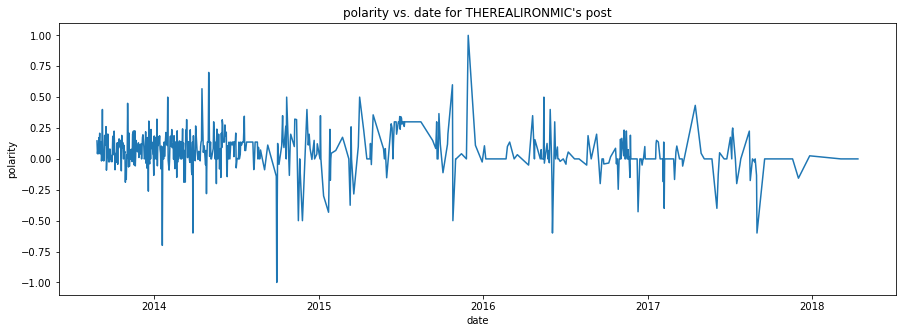

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(df_user1_polarity)
plt.ylabel('polarity')
plt.xlabel('date')
plt.title('polarity vs. date for THEREALIRONMIC\'s post')
plt.show()

In [76]:
df_generalvanguard = tweet_func('generalvanguard')

0
200
399
598
798
998
1198
1398
1598
1798
1993
2003
2003
2003
2003
2003
2003
2003
2003
Positive tweets percentage: 29.45581627558662 %
Negative tweets percentage: 10.584123814278582 %
Neutral tweets percentage: 59.960059910134795 %


Positive tweets:
Tomorrow May 4th 2018 8pm-2am. 
Gangsta Gala 3x.  Shout out to all those who are confirmed for the night ... Epic i… https://t.co/OCVM8ntfrs
Team Training .. @gangstamackin with my Guy @therealironmic and the True 2 Life team and Christian Claudio… https://t.co/HOSZii4Kyw
Please join our MC for the evening, GMACC’s founder, Shanduke McPhatter in what promises to be a memorable night, f… https://t.co/5rS4Er1Nui
Please join our MC for the evening, GMACC’s founder, Shanduke McPhatter in what promises to be a memorable night, f… https://t.co/Y9e1fKWqgS
I posted a new video to Facebook https://t.co/BbbdgpCc3K
Council Member Laurie Cumbo Laurie Cumbo 35th Council DST Laurie Cumbo
Summer Youth Resource Fair. G-M.A.C.C. Inc. always working.
RT @NN

In [77]:
df_user2 = pd.DataFrame(df_generalvanguard)
df_user2['date1'] = [i.date() for i in df_user2.date]
df_user2_grouped = df_user2.groupby(df_user1.date1)
df_user2_polarity = df_user2_grouped.mean()

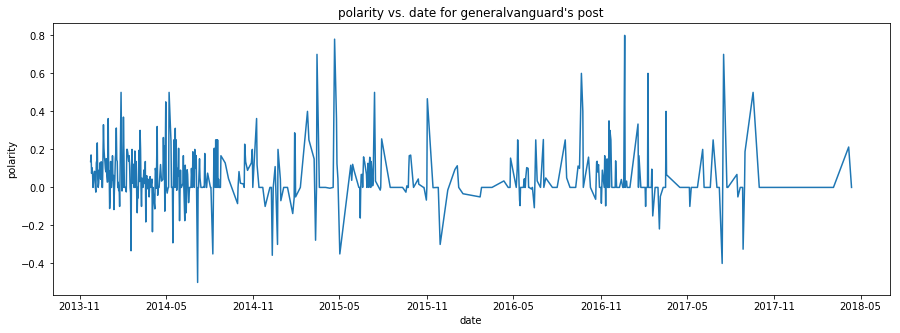

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(df_user2_polarity)
plt.ylabel('polarity')
plt.xlabel('date')
plt.title('polarity vs. date for generalvanguard\'s post')
plt.show()

In [60]:
screen_names = ['SMDotarachi','CashJayB','QC_MrSwapItOut','TyquanAssassin','DutchieDntSHOOT',   
'younggodumb',      
'DotFrmTW',         
'LilBubbaFrmTW',     
'FBG_KingCole',       
'oblock_savage (rip)',   
'Dayski063_',         
'Quez10k',           
'RichieJerk6200_',     
'Justsmash_dahoe']    

In [61]:
d_new_people = {}

In [62]:
for screen_name in screen_names:
    d_new_people['df_'+screen_name] = get_tweet(screen_name)

number of tweets: 200
number of tweets: 400
number of tweets: 599
number of tweets: 798
number of tweets: 994
number of tweets: 1192
number of tweets: 1387
number of tweets: 1585


KeyboardInterrupt: 

In [ ]:
l = []
l.append(''.join(d['df_TyquanAssassin'].texts.values))
for i in range(len(d_new_people)):
    t = ''.join(d_new_people[list(d_new_people.keys())[i]].texts.values)
    l.append(t)

In [214]:
len(l)

11

In [215]:

vect = TfidfVectorizer()
tfidf = vect.fit_transform(l)
s = (tfidf * tfidf.T).A

In [217]:
s[8]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [210]:
a = ''.join(d['df_TyquanAssassin'].texts.values)
b = ''.join(d_new_people['df_DutchieDntSHOOT'].texts.values)
vect = TfidfVectorizer()
tfidf = vect.fit_transform([a,b])
s = (tfidf * tfidf.T).A

In [211]:
s

array([[ 1.        ,  0.55819188],
       [ 0.55819188,  1.        ]])

In [120]:
d_new_people['df_TyquanAssassin']

,created_at,favorite_count,favorited,id,retweet_count,retweeted,texts,truncated,user_name
0,2018-04-06 03:10:57,1,False,982093271848583168,1,False,My Boy #SuzyyTweet 🤙🏾 https://t.co/pEVbTwQlWq,False,TyquanAssassin
1,2018-01-21 08:46:24,0,False,954998601645809664,4,False,RT @TyquanAssassin: UNOs4Life 👑😤 @GKirahAssass...,False,TyquanAssassin
2,2018-01-21 08:44:36,0,False,954998150682628097,1288,False,RT @FBG_DUCK: Rip @FREDOSANTANA300. Aint Never...,False,TyquanAssassin
3,2018-01-21 08:44:26,0,False,954998107288363008,92,False,RT @FBG_DUCK: &amp; Its Still FUCK DA OPPS 💯💯 ...,False,TyquanAssassin
4,2018-01-21 08:43:54,14,False,954997972130988034,6,False,It’s A Real Nigga Holiday 🗣 1:21 🕊 HBD K.I ‼️🎈...,False,TyquanAssassin
5,2016-11-22 03:19:51,14,False,800901580505706496,4,False,UNOs4Life 👑😤 @GKirahAssassin Never Let Up Baby...,False,TyquanAssassin
6,2016-04-07 14:34:44,0,False,718084600434597888,7,False,RT @DOT_063: Wish You Was Still Here @TyquanAs...,False,TyquanAssassin
7,2016-02-22 22:54:52,0,False,701903005965225985,9,False,RT @TyquanWorld_: If You Was Here I Know You H...,False,TyquanAssassin
8,2016-02-21 16:20:12,2,False,701441297115054080,0,False,@GKirahAssassin We Numba Ones4Life 🙏🏾👭😤,False,TyquanAssassin
9,2016-02-21 09:39:20,13,False,701340419687251968,0,False,Uno I'll Foreva Hold Shit Down #UnoAmigaTweet 💍👭,False,TyquanAssassin


In [118]:
for key in d_new_people.keys():
    d_new_people[key]['user_name'] = key[3:]
    

In [121]:
frames = []
for i in range(len(d_new_people)):
    t = (d_new_people[list(d_new_people.keys())[i]])
    frames.append(t)

In [122]:
result = pd.concat(frames)

In [123]:
result

,created_at,favorite_count,favorited,id,retweet_count,retweeted,texts,truncated,user_name
0,2018-04-30 11:37:43,0,False,990918115528728577,2188,False,RT @RSEWTRR: ion know how i feel but i be feeling,False,SMDotarachi
1,2018-04-29 21:12:27,0,False,990700364767916034,0,False,Finally getting my hair done,False,SMDotarachi
2,2018-04-29 20:48:16,0,False,990694275095678977,0,False,I'ma stay shut lol,False,SMDotarachi
3,2018-04-29 19:30:11,0,False,990674625238585345,1,False,RT @Oldddsoulllll_: How could you hate im just...,False,SMDotarachi
4,2018-04-29 19:30:03,0,False,990674592598458368,0,False,So much drama that's why I keep my distance. I...,False,SMDotarachi
5,2018-04-29 19:28:11,0,False,990674123021017088,0,False,"I'm used to people leaving my life , death onl...",False,SMDotarachi
6,2018-04-29 19:26:39,1,False,990673736931201026,1,False,🗣️🗣️🗣️ speak . https://t.co/j76iYFAYGz,False,SMDotarachi
7,2018-04-29 19:25:12,0,False,990673370659393538,0,False,Outta sight outta mind . Fuck you if it's fuck...,False,SMDotarachi
8,2018-04-29 19:20:02,0,False,990672073356992513,20,False,RT @Tahx1k: If I can't trust you it's fuck you.,False,SMDotarachi
9,2018-04-29 19:18:49,0,False,990671764182261760,1,False,RT @OhThatsDuane: I aint even on that period,False,SMDotarachi


In [124]:
result['texts'] = list(map(emoji.demojize ,result['texts']))


In [125]:
result

,created_at,favorite_count,favorited,id,retweet_count,retweeted,texts,truncated,user_name
0,2018-04-30 11:37:43,0,False,990918115528728577,2188,False,RT @RSEWTRR: ion know how i feel but i be feeling,False,SMDotarachi
1,2018-04-29 21:12:27,0,False,990700364767916034,0,False,Finally getting my hair done,False,SMDotarachi
2,2018-04-29 20:48:16,0,False,990694275095678977,0,False,I'ma stay shut lol,False,SMDotarachi
3,2018-04-29 19:30:11,0,False,990674625238585345,1,False,RT @Oldddsoulllll_: How could you hate im just...,False,SMDotarachi
4,2018-04-29 19:30:03,0,False,990674592598458368,0,False,So much drama that's why I keep my distance. I...,False,SMDotarachi
5,2018-04-29 19:28:11,0,False,990674123021017088,0,False,"I'm used to people leaving my life , death onl...",False,SMDotarachi
6,2018-04-29 19:26:39,1,False,990673736931201026,1,False,:speaking_head:️:speaking_head:️:speaking_head...,False,SMDotarachi
7,2018-04-29 19:25:12,0,False,990673370659393538,0,False,Outta sight outta mind . Fuck you if it's fuck...,False,SMDotarachi
8,2018-04-29 19:20:02,0,False,990672073356992513,20,False,RT @Tahx1k: If I can't trust you it's fuck you.,False,SMDotarachi
9,2018-04-29 19:18:49,0,False,990671764182261760,1,False,RT @OhThatsDuane: I aint even on that period,False,SMDotarachi


In [126]:
result.to_csv('all_tweet_data.csv')

In [153]:
### william's poeple

l = [''.join(df.texts.values)]
for key in d_new_people.keys():
    l.append(extract_texts(d_new_people[key]))
vect = TfidfVectorizer()
tfidf = vect.fit_transform(l)
s = (tfidf * tfidf.T).A
(s[0]> 0.5).sum()

10

In [155]:
s[0]

array([ 1.        ,  0.48122999,  1.        ,  0.51600161,  0.51531422,
        0.59320885,  0.        ,  0.64047284,  0.55370354,  0.39792777,
        0.60857692,  0.43435543,  0.50387974,  0.5566008 ,  0.40861196])

In [156]:
d_new_people.keys()
    

dict_keys(['df_SMDotarachi', 'df_TyquanAssassin', 'df_DutchieDntSHOOT', 'df_RichieJerk6200_', 'df_DotFrmTW', 'df_oblock_savage (rip)', 'df_FBG_KingCole', 'df_LilBubbaFrmTW', 'df_CashJayB', 'df_Justsmash_dahoe', 'df_younggodumb', 'df_QC_MrSwapItOut', 'df_Quez10k', 'df_Dayski063_'])

In [1]:
for key in d.keys():
    print(key)

NameError: name 'd' is not defined

In [1]:
import pandas as pd
import emoji

In [2]:
df = pd.read_json('10_people_twitter_data.json')

In [3]:
df['texts'] = list(map(emoji.demojize ,df['texts']))


In [4]:
df

,created_at,favorite_count,favorited,id,retweet_count,retweeted,texts,truncated,username
0,2014-11-18 22:27:59,3,False,534835435315679233,1,False,Cooling Witt Baee Whilee She Play The Game \n#...,False,TuTuGang_Bing
1,2014-09-16 02:37:31,0,False,511705408973832192,1,False,RT @MacZaddyBrii: Tomar Me &amp;&amp; My Girfr...,False,TuTuGang_Bing
10,2014-07-12 10:07:59,0,False,487901175803420673,1,False,RT @younggodumb: @TuTuGang_Bing i mss u 2 sis wyo,False,TuTuGang_Bing
100,2014-04-22 16:31:18,0,False,458644221218811904,0,False,Rt to FT :hundred_points:,False,TuTuGang_Bing
1000,2013-09-30 16:34:12,0,False,384717828932112384,1,False,RT @AintchuKeshia: @FamoussBing aw,False,TuTuGang_Bing
10000,2018-03-06 19:14:58,2,False,971101853273509889,1,False,I’m Confused :man_shrugging_medium_skin_tone:,False,KingVonFrmdaWic
10001,2018-03-06 19:01:15,2,False,971098399348068352,0,False,@Ladyabnormal :flushed_face::face_with_monocle...,False,KingVonFrmdaWic
10002,2018-03-06 18:55:15,1,False,971096891067981824,0,False,@Ladyabnormal :flushed_face:. U tryna tweak wi...,False,KingVonFrmdaWic
10003,2018-03-06 18:52:44,0,False,971096257795108866,0,False,@Ladyabnormal :face_with_tears_of_joy:. N nah ...,False,KingVonFrmdaWic
10004,2018-03-06 18:51:35,1,False,971095966295175169,0,False,@Ladyabnormal Say dat den.,False,KingVonFrmdaWic


In [5]:
df.to_csv('10_people_twitter_data.csv')

In [10]:
l = [3302226641,
1270629457,
497652820,
1564419072,
349168702,
771262231614935040,
495163935,
339385646]

In [18]:
for i in l:    
    u = api.get_user(i)
    print(u.screen_name)


TYMBKTONY
freefr8
DaRealKidMarley
Honchofrmls
OGang_FrizzO
MasterJustin7
TrapnDraco
Durkkmode_


In [17]:
api.get_user(3302226641).screen_name

'TYMBKTONY'